In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the Data
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


No Null Values

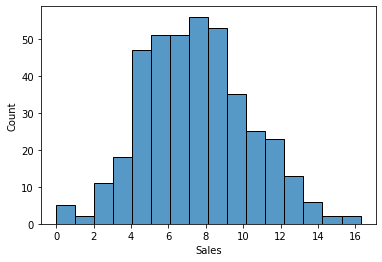

In [4]:
sns.histplot(df.Sales);

In [5]:
def filt(x):
    if x <= np.mean(df.Sales):
        return 'Low Sale'
    else: 
        return 'High Sale'

In [6]:
df['sales_cat'] = df['Sales'].copy()
df['sales_cat'] = df['sales_cat'].apply(filt)

df.pop('Sales')

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High Sale
1,111,48,16,260,83,Good,65,10,Yes,Yes,High Sale
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High Sale
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low Sale
4,141,64,3,340,128,Bad,38,13,Yes,No,Low Sale


In [7]:
df.sales_cat.value_counts()

Low Sale     201
High Sale    199
Name: sales_cat, dtype: int64

In [8]:
label_encoder = preprocessing.LabelEncoder()

df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc']) 

df['Urban'] = label_encoder.fit_transform(df['Urban']) 

df['US'] = label_encoder.fit_transform(df['US']) 

df['sales_cat'] = label_encoder.fit_transform(df['sales_cat'])

df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [9]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000,0.50250
std,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113,0.50062
min,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000,0.00000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000,0.00000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000,1.00000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000,1.00000
max,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000,1.00000


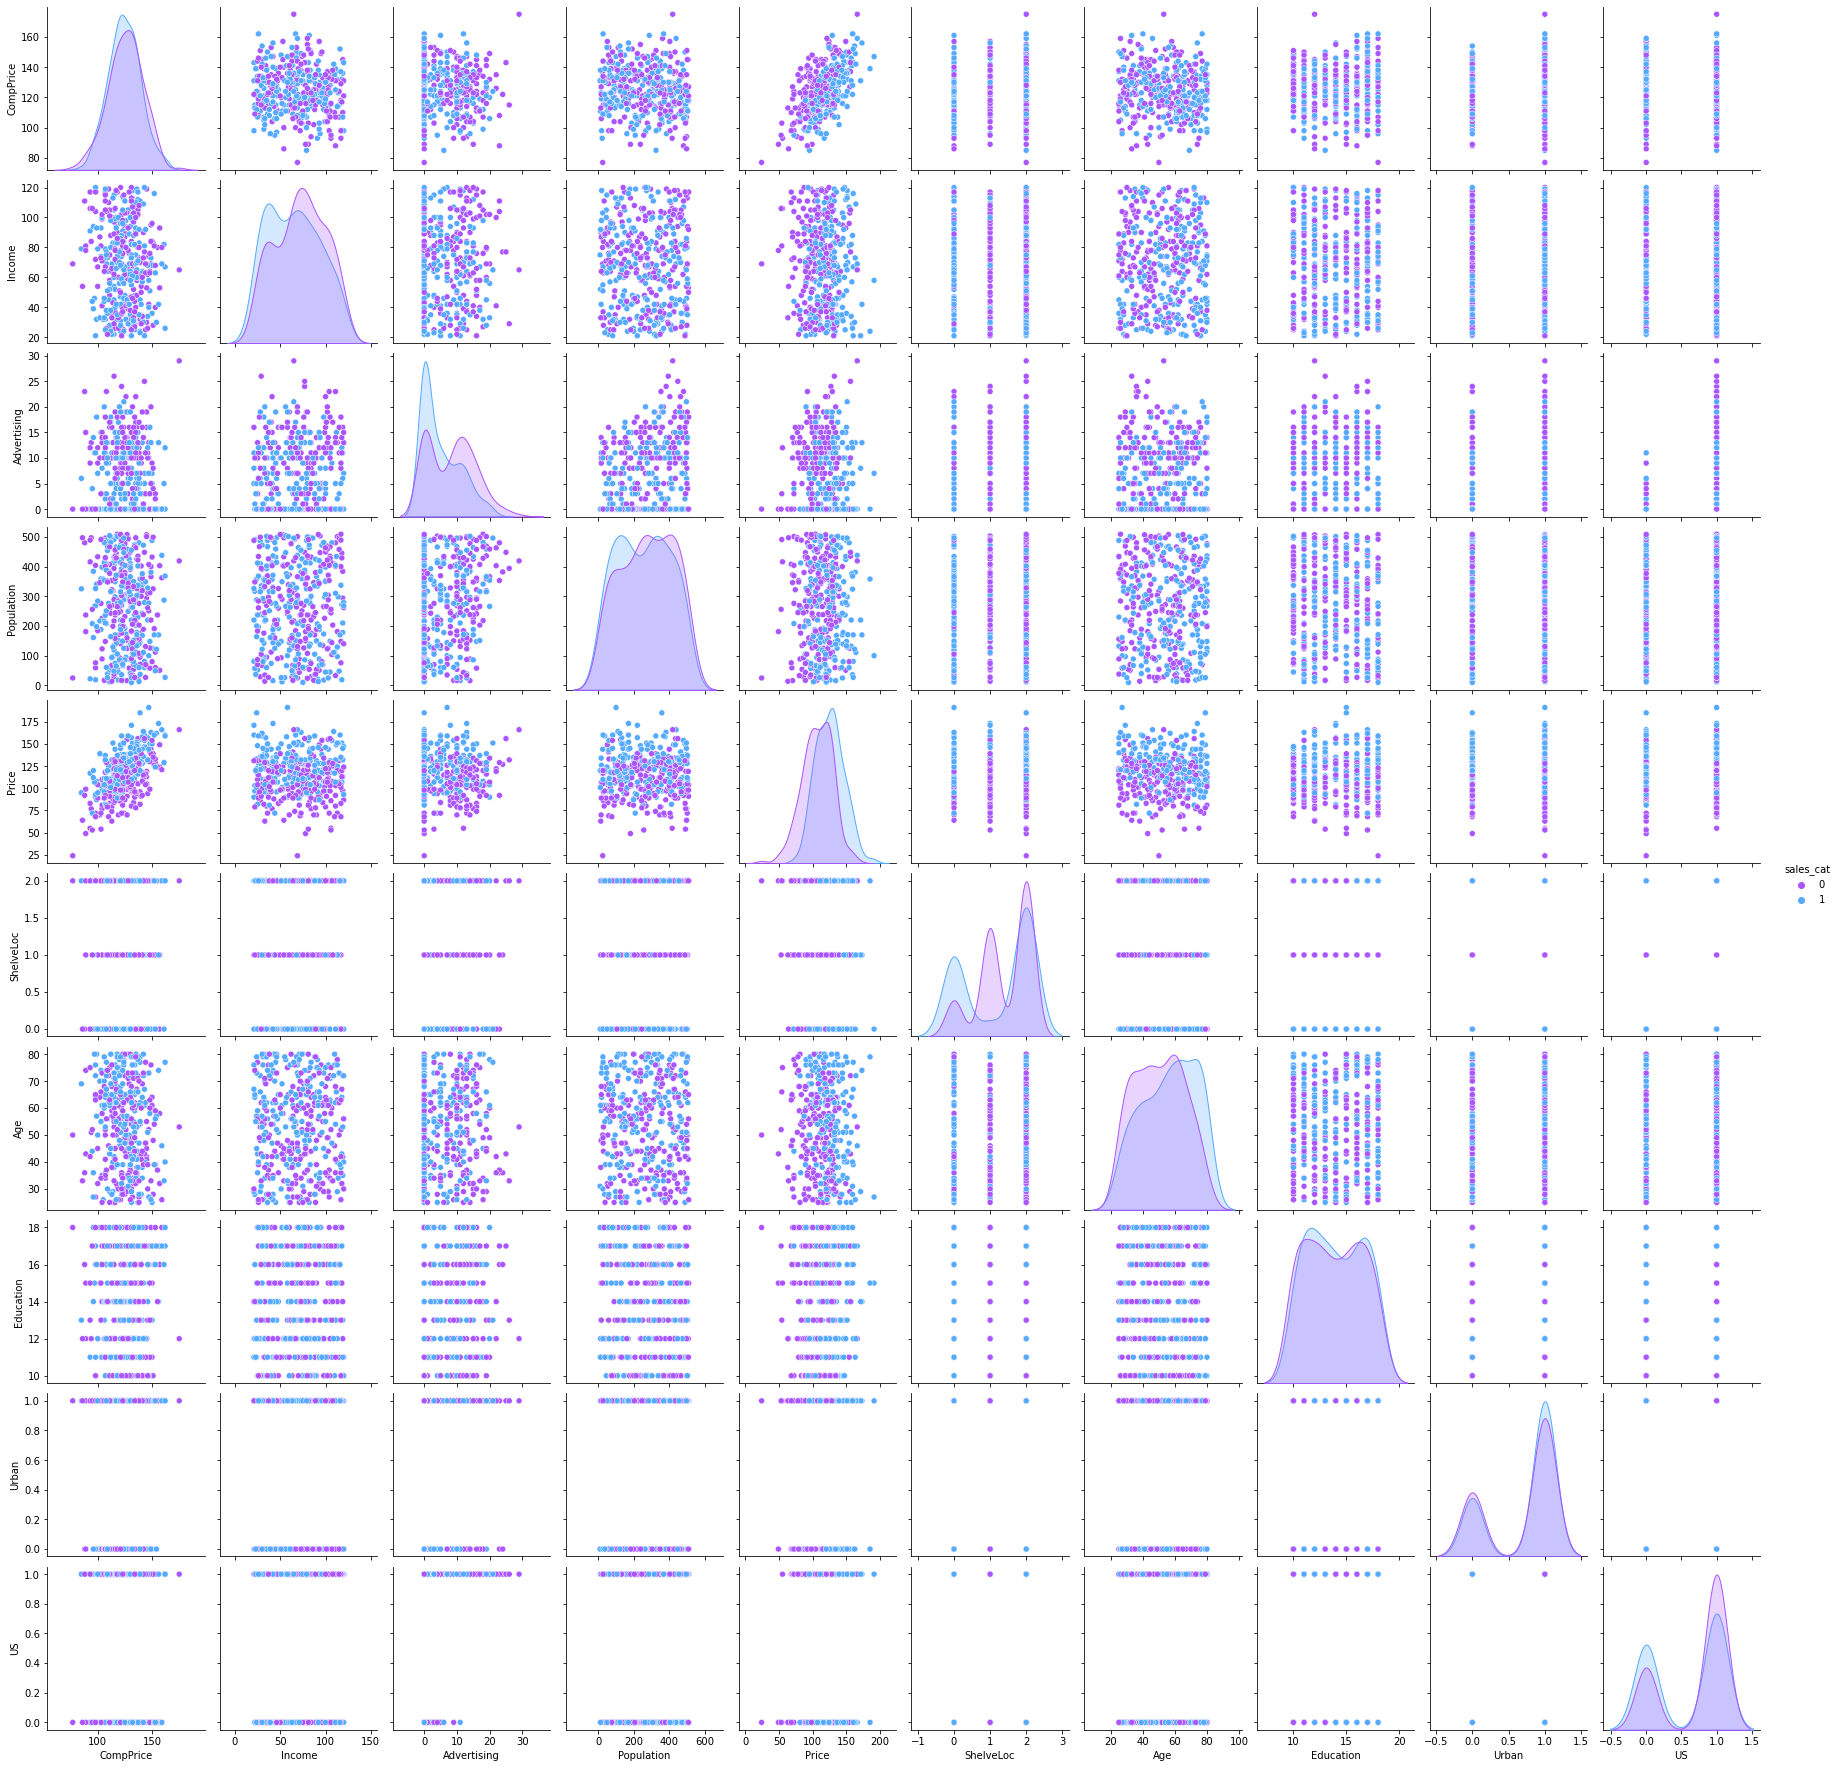

In [10]:
sns.pairplot(df, hue = 'sales_cat', palette = 'cool_r');

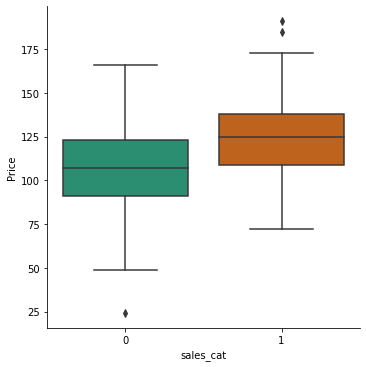

In [11]:
sns.catplot(x = 'sales_cat', y = 'Price', data = df, kind = 'box', palette = 'Dark2');

# Random Forest

In [12]:
X = df.iloc[:, :-1].values
y = df.sales_cat.values

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Split the dataset into a training set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [15]:
# Create the RandomForestClassifier object
rf = RandomForestClassifier(random_state = 101)

In [16]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [17]:
rf_y_pred = rf.predict(X_test)

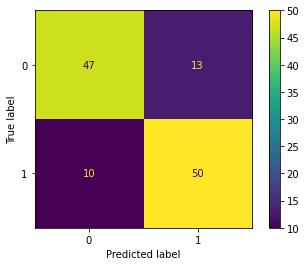

In [18]:
plot_confusion_matrix(rf, X_test, y_test);

In [19]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        60
           1       0.79      0.83      0.81        60

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



Thus the accuracy is 81%, better than the accuracy for the decision tree model which was 63%.

* Feature Importances

In [20]:
ft_imp = pd.Series(rf.feature_importances_, 
                   index = df.iloc[:, :-1].columns).sort_values(ascending = False)
print(ft_imp.head(10))

Price          0.234563
Age            0.141945
CompPrice      0.126441
Income         0.116626
Advertising    0.104750
Population     0.097352
ShelveLoc      0.093222
Education      0.052167
US             0.017421
Urban          0.015512
dtype: float64


In [21]:
from itertools import combinations

rf = RandomForestClassifier(random_state = 101)
old_accuracy = 0
col = df.iloc[:, :-1].columns

for combo in combinations(col, 6):
        X_imp = df[list(combo)].values
        X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.3, 
                                                            random_state = 101)
        
        rf.fit(X_train, y_train)
        new_accuracy = rf.score(X_test, y_test)
        
        if new_accuracy > old_accuracy:
            old_accuracy = new_accuracy
            rf_y_pred = rf.predict(X_test)
            features = combo

print('Important Features: ', features )
print('\n Report: \n', classification_report(y_test, rf_y_pred))

Important Features:  ('CompPrice', 'Advertising', 'Price', 'ShelveLoc', 'Education', 'US')

 Report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        60
           1       0.84      0.85      0.84        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



# Tuning the Random Forest

* Grid Search

In [22]:
n_estimators = list(range(10, 100, 5))

param_grid = {
    'n_estimators': n_estimators, # The number of trees
}

rf = RandomForestClassifier(random_state = 101)

gs = GridSearchCV(rf, param_grid, cv = 5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': [10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95]})

# Elbow Graph

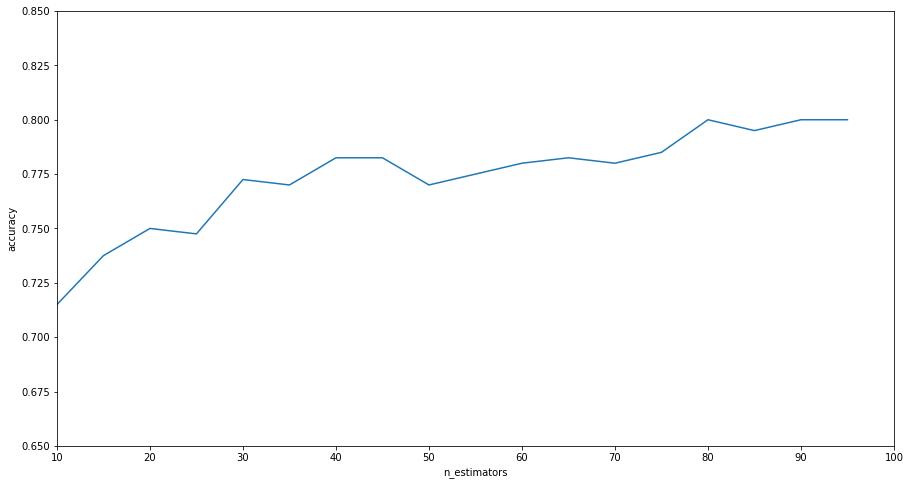

In [24]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

scores = gs.cv_results_['mean_test_score']
figure(figsize = (15, 8))
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(10, 100)
plt.ylim(0.65, 0.85)
plt.show()

# Final Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
rf_final = RandomForestClassifier(random_state = 101, n_estimators = 50)
rf_final.fit(X_train, y_train)
rf_final_y_pred = rf_final.predict(X_test)

print(classification_report(y_test, rf_final_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        60
           1       0.82      0.88      0.85        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



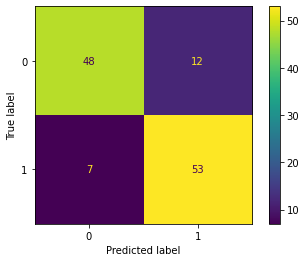

In [26]:
plot_confusion_matrix(rf_final, X_test, y_test);

# Visualizing Random Forest

In [27]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

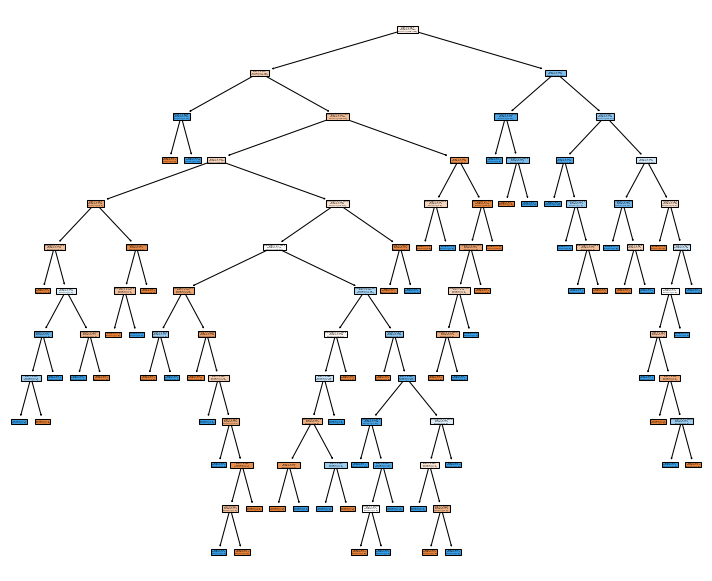

In [28]:
plt.figure(figsize = (12, 10), dpi = 75)
plot_tree(rf_final.estimators_[0], feature_names = df.iloc[:, :-1].columns, filled = True);

* Visualization of multiple trees used as estimator

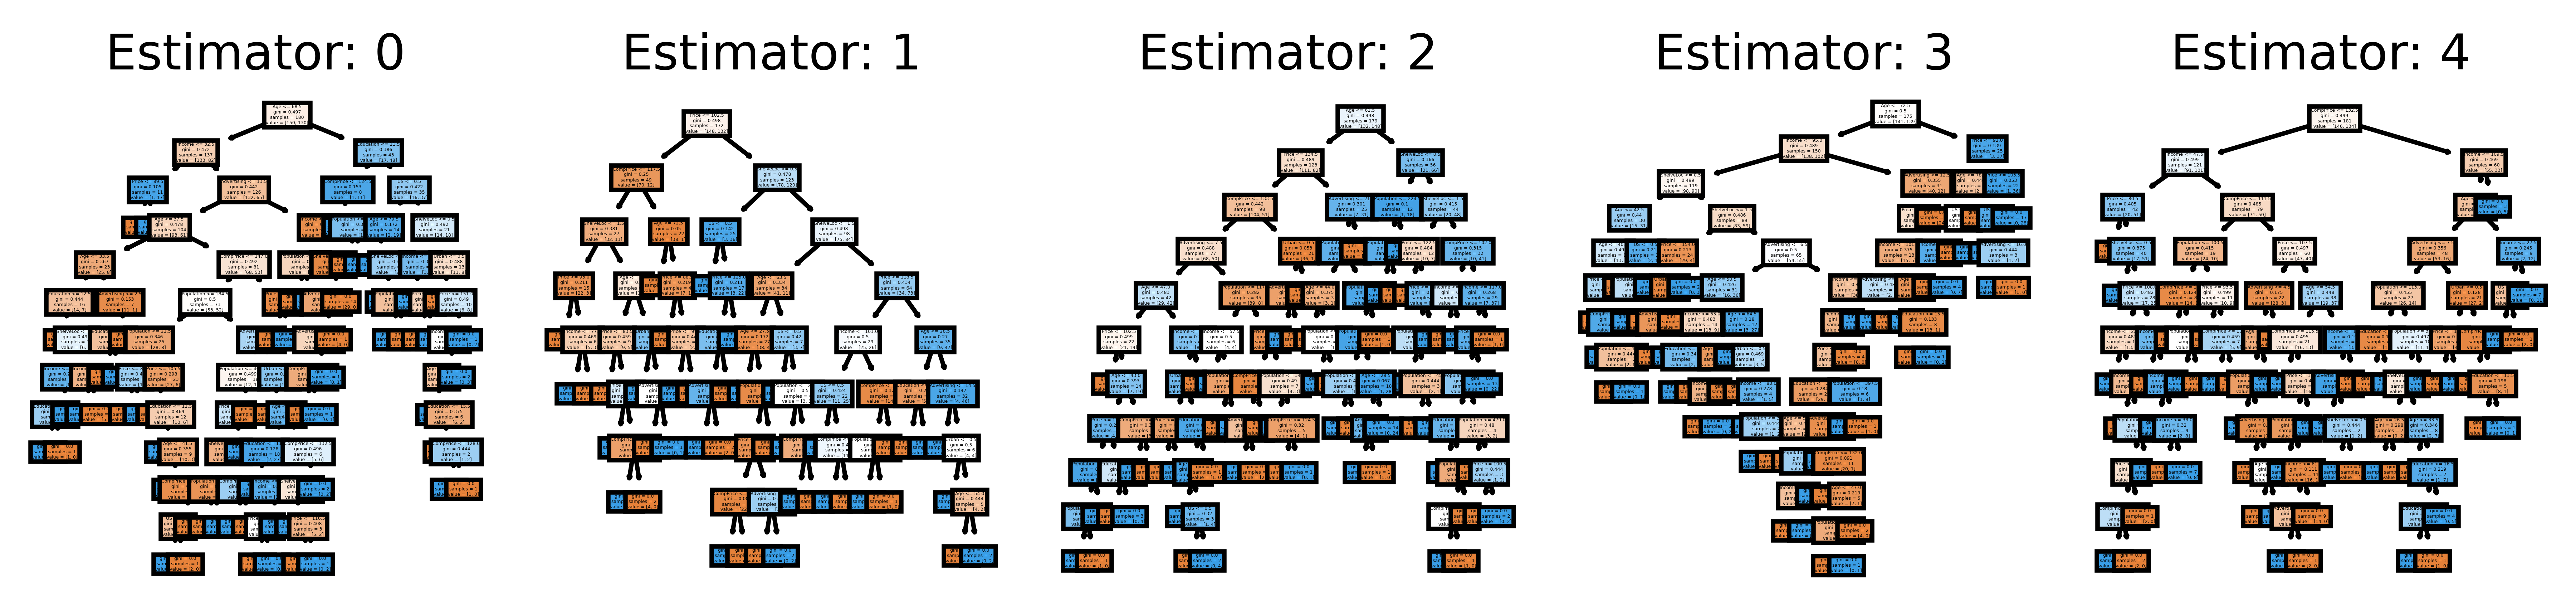

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10,2), dpi = 900) 
for index in range(0, 5):
    plot_tree(rf_final.estimators_[index],
                   feature_names = df.iloc[:, :-1].columns,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)